In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/FSDSRegression/main/notebooks/data/gemstone.csv')

In [3]:
df=df.sample(n=10000)

In [4]:
df.drop

<bound method DataFrame.drop of             id  carat        cut color clarity  depth  table     x     y   
46959    46959   1.05      Ideal     I     SI2   61.8   58.0  6.54  6.51  \
45325    45325   2.20    Premium     I     SI1   61.9   59.0  8.38  8.33   
192042  192042   0.40      Ideal     F     SI1   61.7   55.0  4.78  4.76   
102264  102264   0.46      Ideal     I      IF   62.4   58.0  4.93  4.97   
7562      7562   1.01  Very Good     F     SI1   63.5   58.0  6.31  6.37   
...        ...    ...        ...   ...     ...    ...    ...   ...   ...   
36889    36889   0.72       Good     F     VS2   59.4   60.0  5.84  5.82   
127592  127592   1.54    Premium     G     VS2   59.8   59.0  7.55  7.49   
116221  116221   0.33      Ideal     D     VS2   61.9   57.0  4.42  4.45   
166838  166838   0.91       Fair     F     SI1   64.7   55.0  6.10  6.13   
32365    32365   0.34      Ideal     E      IF   62.1   56.0  4.46  4.47   

           z  price  
46959   4.03   4286  
45325   5.1

In [5]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
### No missing values present in the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 46959 to 32365
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10000 non-null  int64  
 1   carat    10000 non-null  float64
 2   cut      10000 non-null  object 
 3   color    10000 non-null  object 
 4   clarity  10000 non-null  object 
 5   depth    10000 non-null  float64
 6   table    10000 non-null  float64
 7   x        10000 non-null  float64
 8   y        10000 non-null  float64
 9   z        10000 non-null  float64
 10  price    10000 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 937.5+ KB


In [8]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
46959,46959,1.05,Ideal,I,SI2,61.8,58.0,6.54,6.51,4.03,4286
45325,45325,2.20,Premium,I,SI1,61.9,59.0,8.38,8.33,5.18,17712
192042,192042,0.40,Ideal,F,SI1,61.7,55.0,4.78,4.76,2.94,787
102264,102264,0.46,Ideal,I,IF,62.4,58.0,4.93,4.97,3.09,1255
7562,7562,1.01,Very Good,F,SI1,63.5,58.0,6.31,6.37,4.03,4981


In [9]:
## Lets drop the id column
df= df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
46959,1.05,Ideal,I,SI2,61.8,58.0,6.54,6.51,4.03,4286
45325,2.20,Premium,I,SI1,61.9,59.0,8.38,8.33,5.18,17712
192042,0.40,Ideal,F,SI1,61.7,55.0,4.78,4.76,2.94,787
102264,0.46,Ideal,I,IF,62.4,58.0,4.93,4.97,3.09,1255
7562,1.01,Very Good,F,SI1,63.5,58.0,6.31,6.37,4.03,4981


In [10]:
## check for duplicated records
df.duplicated().sum()

0

In [11]:
## segregate numerical and categorical columns

numerical_columns = df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print('Numerical columns: ', numerical_columns)
print('Categorical Columns: ', categorical_columns)

Numerical columns:  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns:  Index(['cut', 'color', 'clarity'], dtype='object')


In [12]:
df[categorical_columns].describe()

,cut,color,clarity
count,10000,10000,10000
unique,5,7,8
top,Ideal,G,SI1
freq,4770,2391,2788


In [13]:
df[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.787890,61.821890,57.218060,5.713095,5.716828,3.533079,3933.238900
std,0.455786,1.065742,1.900126,1.097015,1.089584,0.678883,3960.916944
min,0.210000,55.300000,52.000000,3.820000,3.780000,2.340000,326.000000
25%,0.400000,61.300000,56.000000,4.710000,4.720000,2.910000,957.000000
50%,0.700000,61.900000,57.000000,5.710000,5.720000,3.530000,2428.500000
75%,1.030000,62.400000,58.000000,6.500000,6.490000,4.030000,5398.000000
max,2.710000,68.300000,68.000000,8.850000,8.730000,5.540000,18791.000000


In [14]:
df['cut'].value_counts()

cut
Ideal        4770
Premium      2626
Very Good    1936
Good          565
Fair          103
Name: count, dtype: int64

In [15]:
df['color'].value_counts()

color
G    2391
E    1850
F    1783
H    1515
D    1255
I     875
J     331
Name: count, dtype: int64

In [16]:
df['clarity'].value_counts()

clarity
SI1     2788
VS2     2495
VS1     1573
SI2     1553
VVS2     816
VVS1     549
IF       205
I1        21
Name: count, dtype: int64

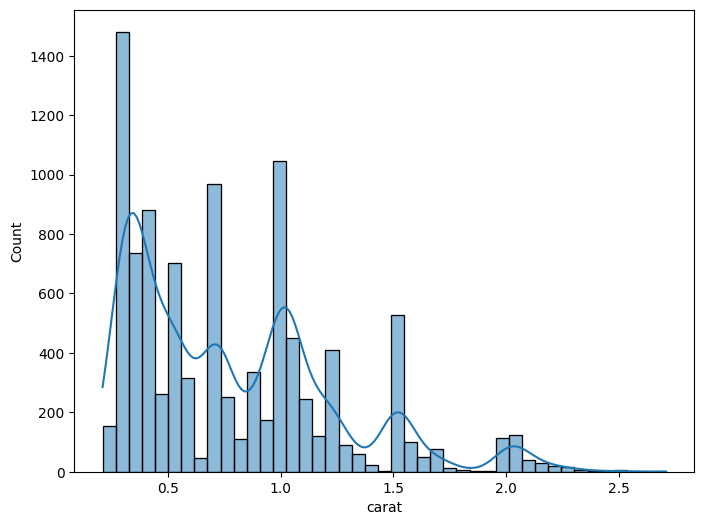

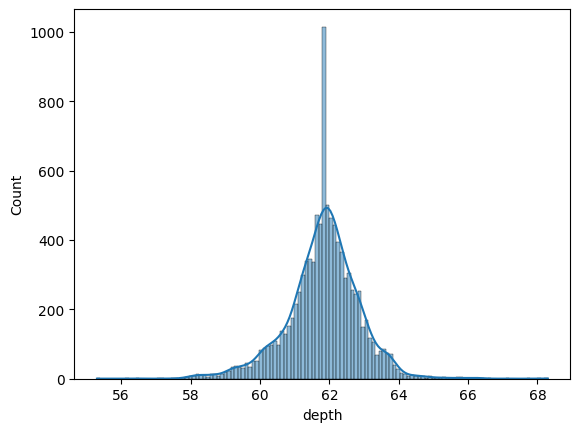

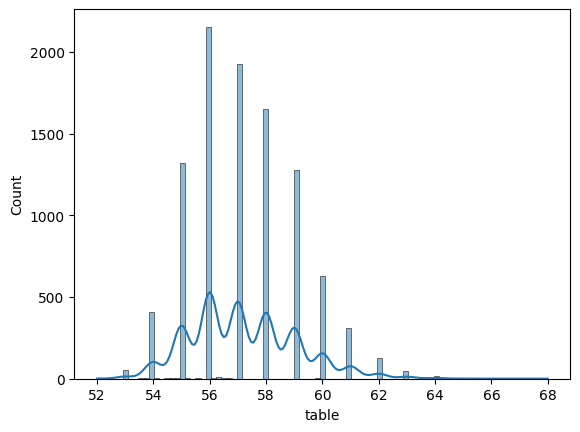

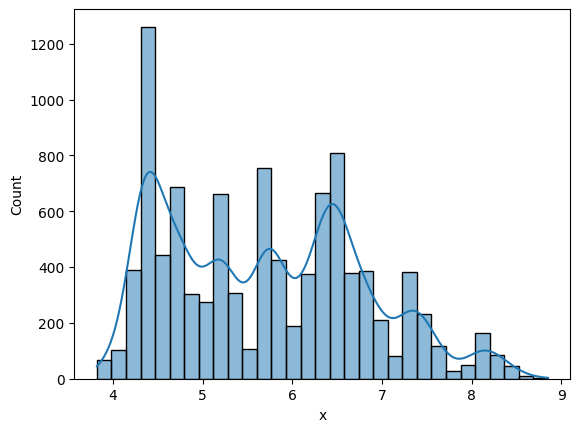

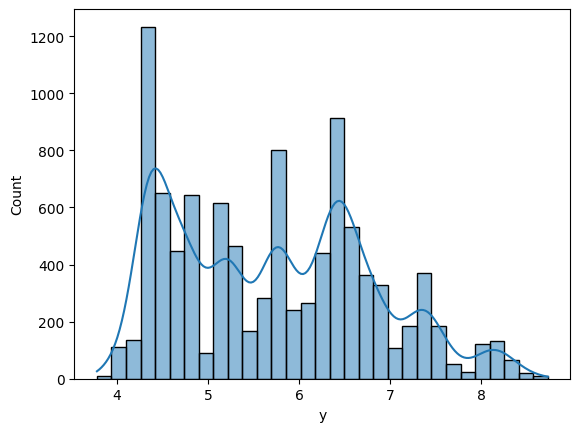

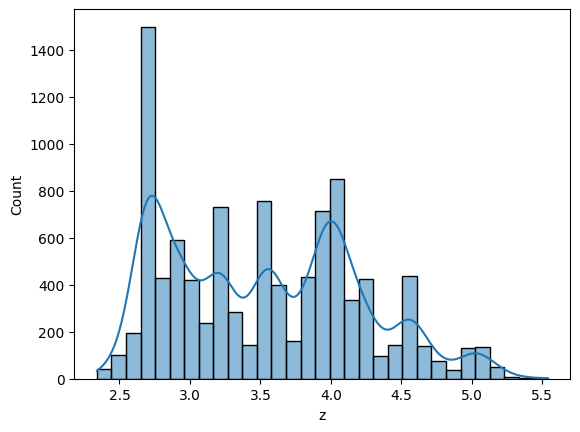

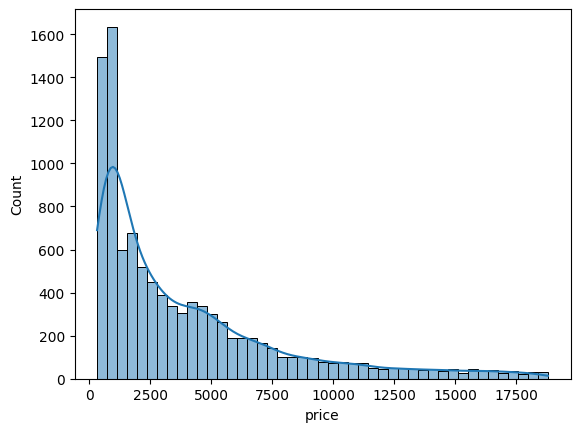

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()


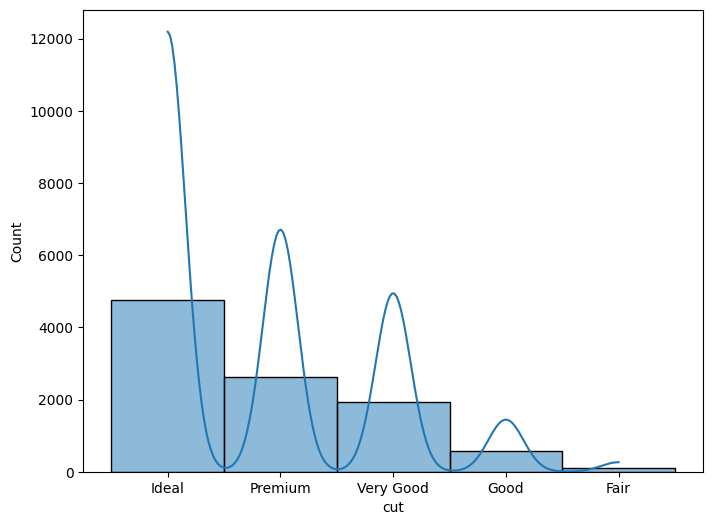

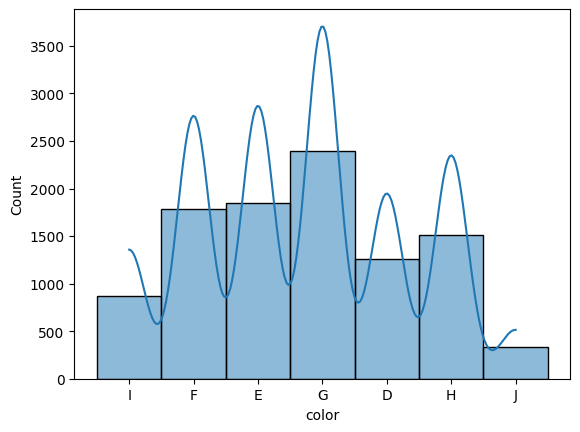

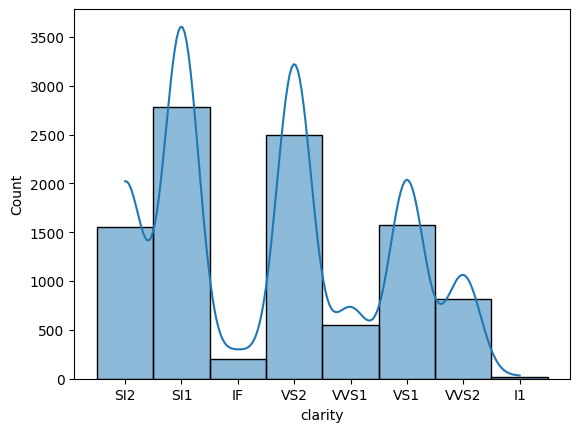

In [18]:
plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

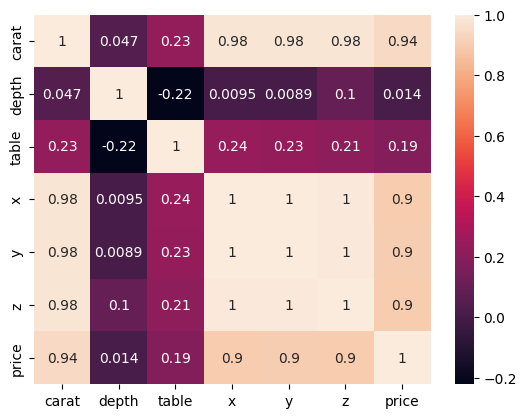

In [19]:
## correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)